In [280]:
import os
os.getcwd()

'e:\\Data_Analysis\\Data_Analytics_Projects\\GDP and Economic Comparison Sri Lanka vs. USA\\GDP-and-Economic-Comparison-Sri-Lanka-vs.-USA\\Notebook'

In [281]:
#importing all the requirement libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


In [282]:
#import datasets
df1=pd.read_csv('../Datasets/Sri Lanka Economy.csv')
df2=pd.read_csv('../Datasets/USA GDP Growth 1961-2021.csv')

In [283]:
df1.head()

,Year,Population,Population growth rate,GDP,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP,Inflation Rate,Annual Change in Inflation Rate
0,2021,"2,17,73,441",0.27%,$84.52B,3.66%,7.27%,"$3,815",3.27%,$84.57B,4.12%,"$3,820",2.69%,Null,Null,$84.57B,7.01%,0.86%
1,2020,"2,17,15,079",0.30%,$80.97B,-3.62%,-5.94%,"$3,694",-4.01%,$81.45B,-3.45%,"$3,720",-7.23%,Null,Null,$81.45B,6.15%,2.63%
2,2019,"2,16,49,664",0.32%,$83.90B,2.33%,-0.94%,"$3,848",-5.20%,$87.46B,2.14%,"$4,010",-0.74%,Null,Null,$87.46B,3.53%,1.39%
3,2018,"2,15,80,710",0.34%,$87.96B,3.27%,-0.31%,"$4,059",-0.44%,$87.46B,3.19%,"$4,040",4.39%,Null,Null,$87.46B,2.14%,-5.57%
4,2017,"2,15,06,813",0.38%,$87.43B,3.58%,-0.91%,"$4,077",4.91%,$83.01B,3.59%,"$3,870",1.57%,Null,Null,$83.01B,7.70%,3.75%


In [284]:
df2.head()

,Year,GDP,GDP per Capita,Growth
0,2021.0,"$22,996.10B","$69,288",5.67%
1,2020.0,"$20,893.74B","$63,028",-3.40%
2,2019.0,"$21,372.57B","$65,095",2.29%
3,2018.0,"$20,527.16B","$62,805",2.92%
4,2017.0,"$19,479.62B","$59,915",2.26%


In [285]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Year                                  62 non-null     int64 
 1   Population                            62 non-null     object
 2   Population growth rate                62 non-null     object
 3   GDP                                   62 non-null     object
 4   GDP growth percentage                 62 non-null     object
 5   Annual change in GDP growth           62 non-null     object
 6   GDP Per Capita                        62 non-null     object
 7   Annual Growth Rate in GDP Per Capita  62 non-null     object
 8   GNI                                   62 non-null     object
 9   GNI Growth Rate                       62 non-null     object
 10  GNI Per Capita                        62 non-null     object
 11  GNI Per Capita Annual Growth Rate 

In [286]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            61 non-null     float64
 1   GDP             61 non-null     object 
 2   GDP per Capita  61 non-null     object 
 3   Growth          61 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


In [287]:
#cheking for null values on Sri Lanka dataset
df1.isnull().sum()


Year                                    0
Population                              0
Population growth rate                  0
GDP                                     0
GDP growth percentage                   0
Annual change in GDP growth             0
GDP Per Capita                          0
Annual Growth Rate in GDP Per Capita    0
GNI                                     0
GNI Growth Rate                         0
GNI Per Capita                          0
GNI Per Capita Annual Growth Rate       0
Government Debt as % of GDP             0
Annual Change in Debt to GDP Ratio      0
GNP                                     0
Inflation Rate                          0
Annual Change in Inflation Rate         0
dtype: int64

In [288]:
#cheking for null values on USA  dataset 
df2.isnull().sum()

Year              1
GDP               1
GDP per Capita    1
Growth            1
dtype: int64

In [289]:
#Drops which having null values 
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [290]:
#find duplicate rows count on USA dataset 
df1.duplicated().value_counts()

False    62
Name: count, dtype: int64

In [291]:
#check dulications on Sri Lanka dataset 
df2.duplicated().value_counts()

False    61
Name: count, dtype: int64

In [292]:
#convert year to int type on Sri Lanka dataset 
df2['Year'] = df2['Year'].astype(int)

In [293]:
df2.head()

,Year,GDP,GDP per Capita,Growth
0,2021,"$22,996.10B","$69,288",5.67%
1,2020,"$20,893.74B","$63,028",-3.40%
2,2019,"$21,372.57B","$65,095",2.29%
3,2018,"$20,527.16B","$62,805",2.92%
4,2017,"$19,479.62B","$59,915",2.26%


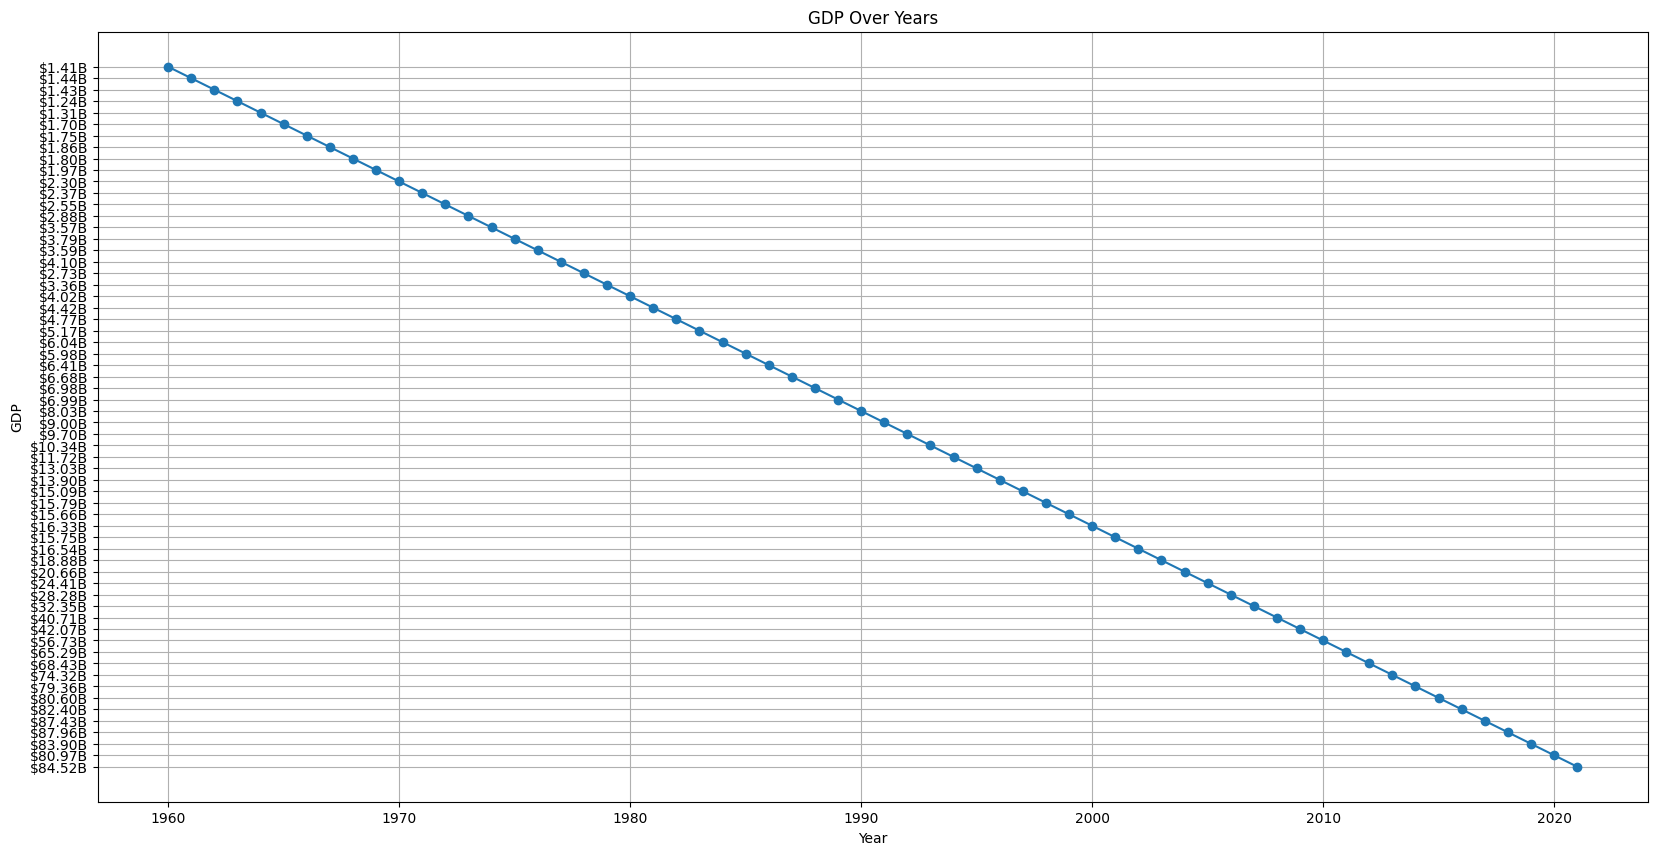

In [294]:

df1.sort_values(by='year', inplace=True)

# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['GDP'], marker='o', linestyle='-')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



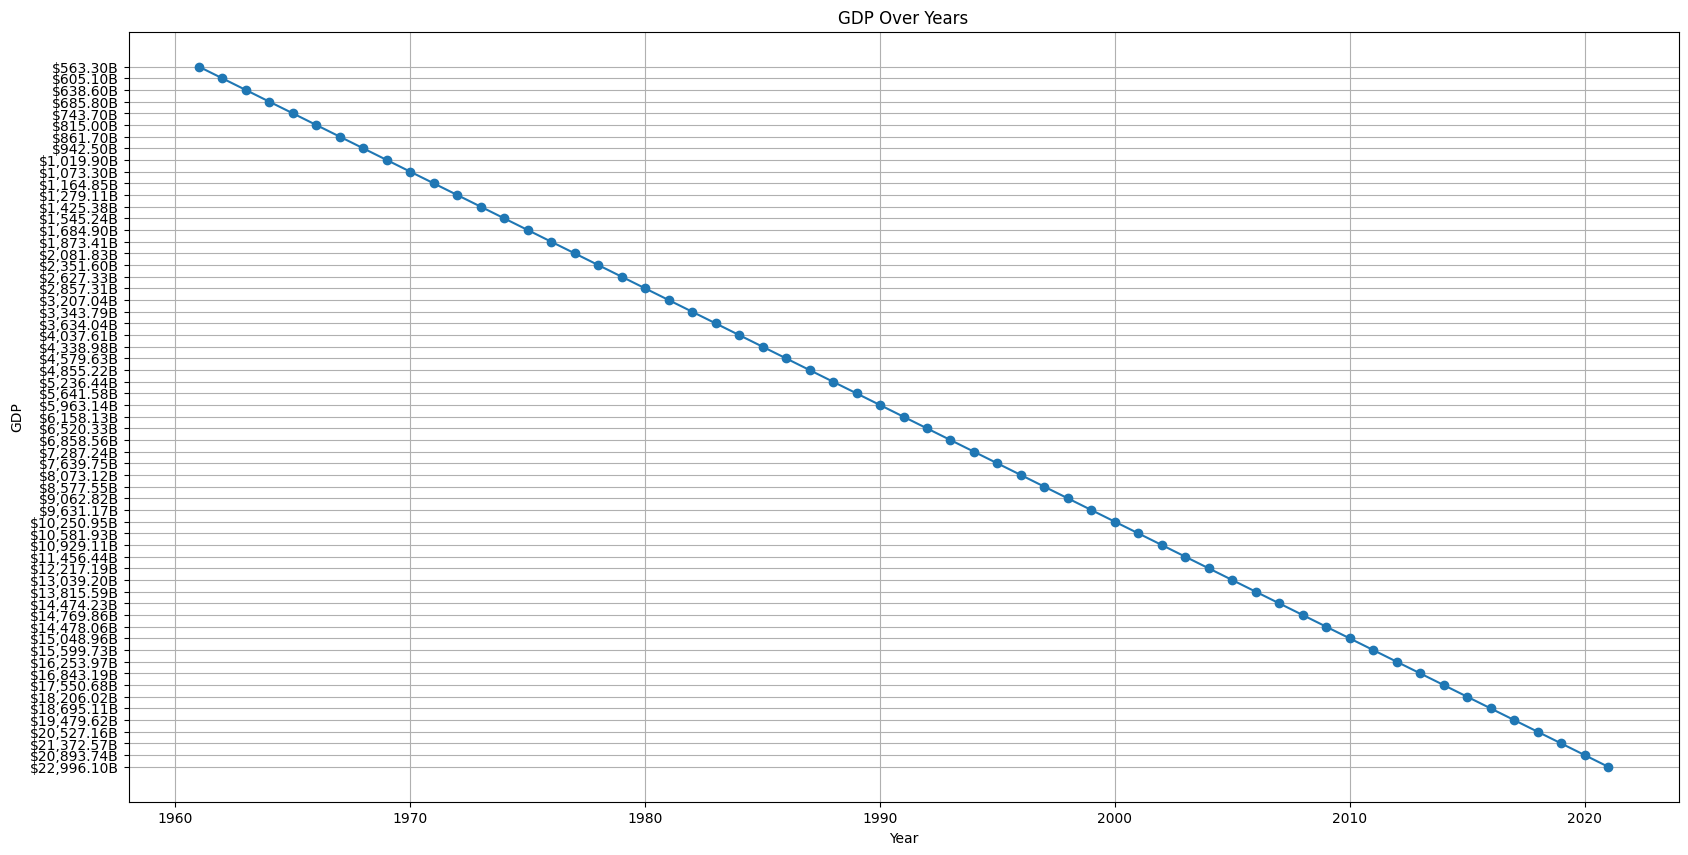

In [295]:

# Assuming df1 has columns 'Year' and 'GDP'
plt.figure(figsize=(20, 10))
plt.plot(df2['Year'], df2['GDP'], marker='o', linestyle='-')
plt.title('GDP Over Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

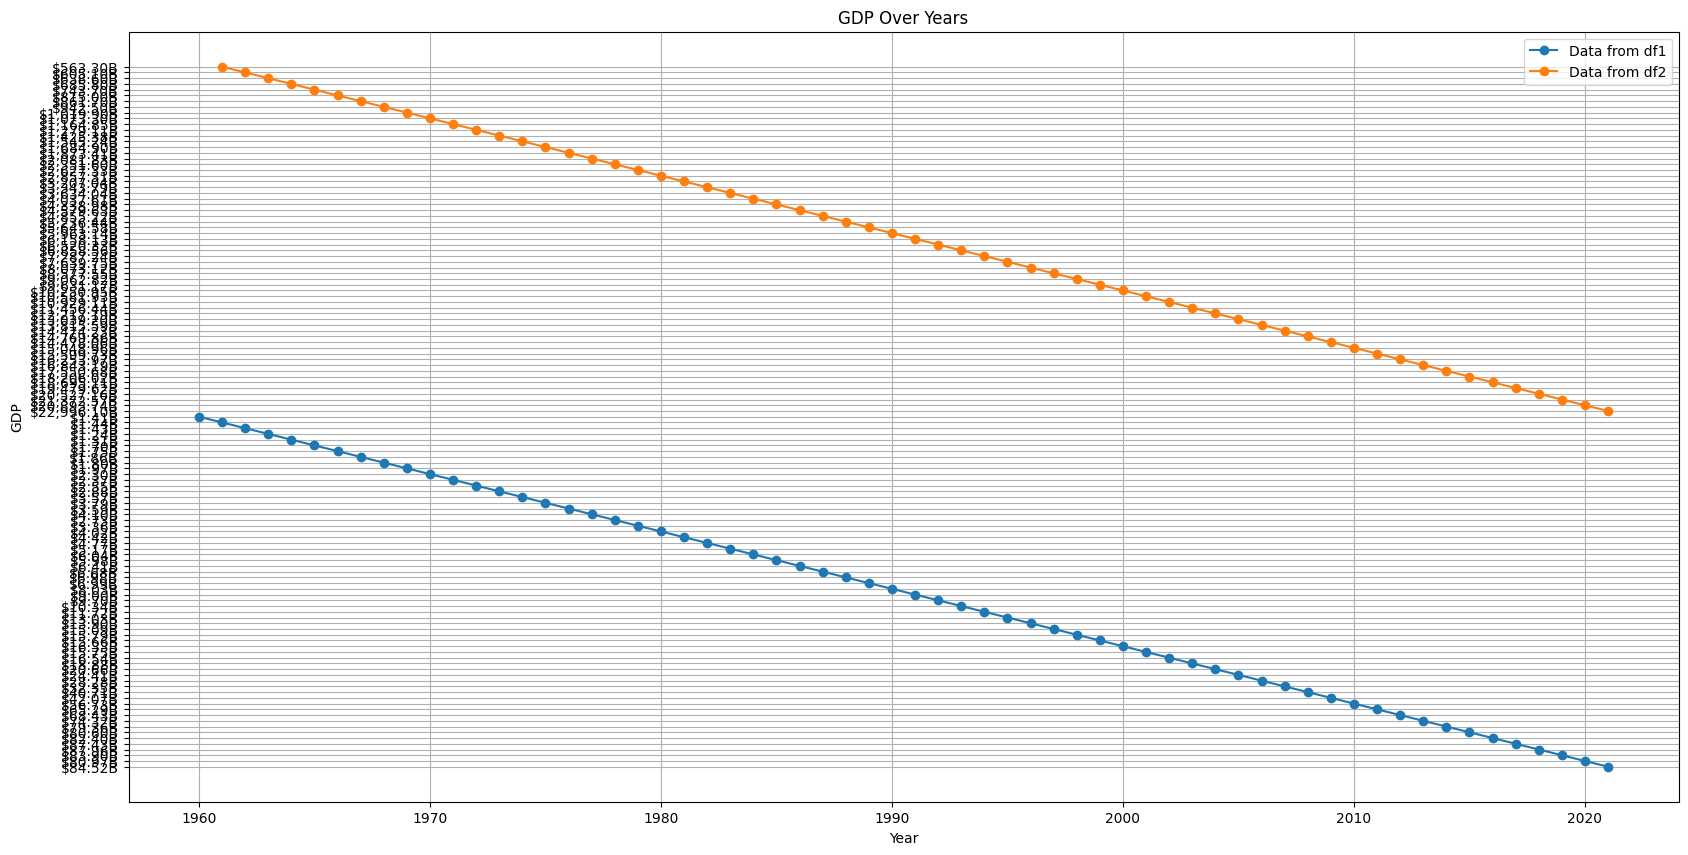

In [296]:


plt.figure(figsize=(20, 10))

# Plot data from df1
plt.plot(df1['Year'], df1['GDP'], marker='o', linestyle='-', label='Sri ')

# Plot data from df2
plt.plot(df2['Year'], df2['GDP'], marker='o', linestyle='-', label='Data from df2')

plt.title('GDP Over Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.legend()  # Show legend to differentiate between the two data sets
plt.show()
